In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
dam_unexp_du = pd.read_excel('./damage_results/damages_2m_du.xlsx', index_col = 0)
dam_unexp_unb = pd.read_excel('./damage_results/damages_2m_unbreach_du.xlsx', index_col = 0)
dam_unexp_rs2 = pd.read_excel('./damage_results/damages_2m_raise_du.xlsx', index_col = 0)

dam_unexp_du['case'] = 'un_statusquo'
dam_unexp_unb['case'] = 'un_unbreach'
dam_unexp_rs2['case'] = 'un_raise2'

In [8]:
dam_unexp_du['tot_damage'] = dam_unexp_du.loc[:, :'secc_panaB'].sum(axis=1)
dam_unexp_unb['tot_damage'] = dam_unexp_unb.loc[:, :'secc_panaB'].sum(axis=1)
dam_unexp_rs2['tot_damage'] = dam_unexp_rs2.loc[:, :'secc_panaB'].sum(axis=1)

# Convergence:

In [20]:
def plot_mean_convergence(ranges, df, ax, xlabel=None, title=None):
    means = []
    for n in ranges:
        means.append(df.loc[:n, 'tot_damage'].mean())
    ax.set_title(title, fontsize = 15)
    ax.plot(ranges, means)
    ax.set_ylabel(xlabel)
    ax.set_xlabel('num. simulations')

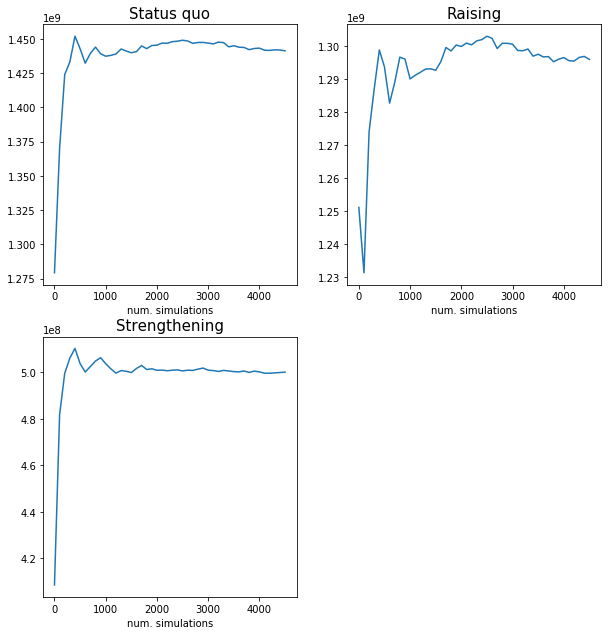

In [21]:
ranges = np.arange(0, 4501, 100)

fig, ax = plt.subplots(2,2, figsize = (10,10))
plot_mean_convergence(ranges, dam_unexp_du, ax[0,0], title='Status quo')
plot_mean_convergence(ranges, dam_unexp_rs2, ax[0,1], title='Raising')
plot_mean_convergence(ranges, dam_unexp_unb, ax[1,0], title='Strengthening')
ax[1,1].axis('off')

fig.subplots_adjust(top=0.92)

# Plot damage

In [ ]:
order = ['ogli_mincB', 'cros_seccB', 'adig_poB', 'secc_panaB', 'adig_poE', 'pana_poC',
         'ogli_mincC', 'cros_seccC', 'adig_poC', 'Pana_poA', 'adig_poF', 'pana_poD',
         'adig_poA', 'secc_panaA', 'adig_poD', 'pana_poB', 'adig_poG']

In [ ]:
order.append('tot_costs')
order.append('case')

In [ ]:
dam = pd.concat([                
                 dam_unexp_du, 
                 dam_unexp_unb, 
                 dam_unexp_rs2,
                ])

In [ ]:
dam['measure'] = dam.apply(lambda row: row.case.split('_')[1], axis=1)
dam['sow'] = dam.apply(lambda row: row.case.split('_')[0], axis=1)

In [ ]:
np.unique(dam['measure'])

array(['raise2', 'statusquo', 'unbreach'], dtype=object)

In [ ]:
sa_ = [
 'cros_seccB',
 'ogli_mincB',
 'cros_seccC',     
 'ogli_mincC',
 'secc_panaA',
 'adig_poE',
 'tot_damage']

In [ ]:
thres = {c: dam.loc[dam.measure == 'statusquo', c].quantile(0.75) for c in sa_}

In [ ]:
from matplotlib.lines import Line2D

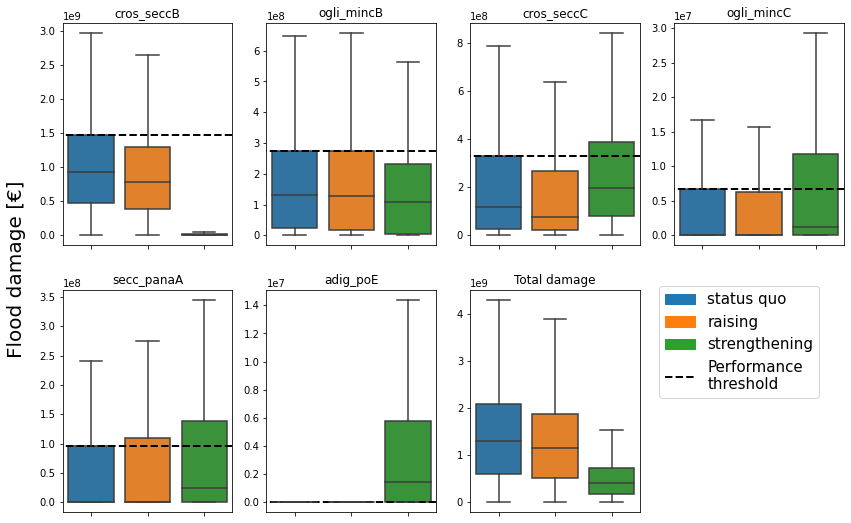

In [ ]:
colors_ = sns.color_palette(n_colors=3)

fig, axes = plt.subplots(2, 4, figsize=(14,9))
i = 0
for triaxis in axes:
    for axis in triaxis:
        if i == 7:
            axis.axis('off')
            continue

        bp = sns.boxplot(data=dam, y = sa_[i], 
                         x ='measure',orient='v',ax = axis, showfliers=False, 
                         palette=colors_, order = ['statusquo', 'raise2', 'unbreach'])
        xlim=bp.get_xlim()
        if i != 6:
            axis.hlines(xmin=-1, xmax=2.5, y=thres[sa_[i]], linestyle='--', color='k', linewidth=2)

        bp.set_xlabel('')
        bp.set_ylabel('')
        bp.set_xticklabels('')
        bp.set_xlim(xlim)

        if sa_[i] == 'tot_damage':
            bp.set_title('Total damage')
        else:
            bp.set_title(sa_[i])

        i = i+1

fig.text(0.07, 0.5, 'Flood damage [€]', va='center', rotation='vertical', fontsize = 20)

lables = ['status quo', 'raising', 'strengthening', 'Performance\nthreshold']
dict_cols = dict(zip(range(len(colors_)), colors_))
dict_labs = dict(zip(range(len(colors_)), lables))

handles = [mpatches.Patch(color = dict_cols[i], label = dict_labs[i]) for i in range(len(colors_))
          ] + [Line2D([0], [0], color='k', lw=2, linestyle='--', label=lables[-1])]

leg = plt.legend(handles=handles, bbox_to_anchor=(0.9,1.05), fontsize = 15)